Visualizing the distributions of dataset across Age, Gender and Nationality

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
metaFilePath = './vox1_meta.csv'
data = pd.read_csv(metaFilePath, delimiter='\t')
data.head()

,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,m,Ireland,dev
1,id10002,A.R._Rahman,m,India,dev
2,id10003,Aamir_Khan,m,India,dev
3,id10004,Aaron_Tveit,m,USA,dev
4,id10005,Aaron_Yoo,m,USA,dev


In [38]:
print(f"The shape of the data : {data.shape}")

The shape of the data : (1251, 5)


<center>Plotting Data Distributions</center>

Gender Distribution

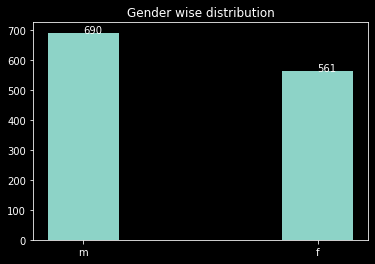

In [39]:
distData  = data.groupby('Gender').size()
distData = distData.sort_values(ascending=False)
x = distData.index
y = distData.values
plt.bar(x, y, width=[0.3, 0.3])

for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.title("Gender wise distribution")
plt.show()

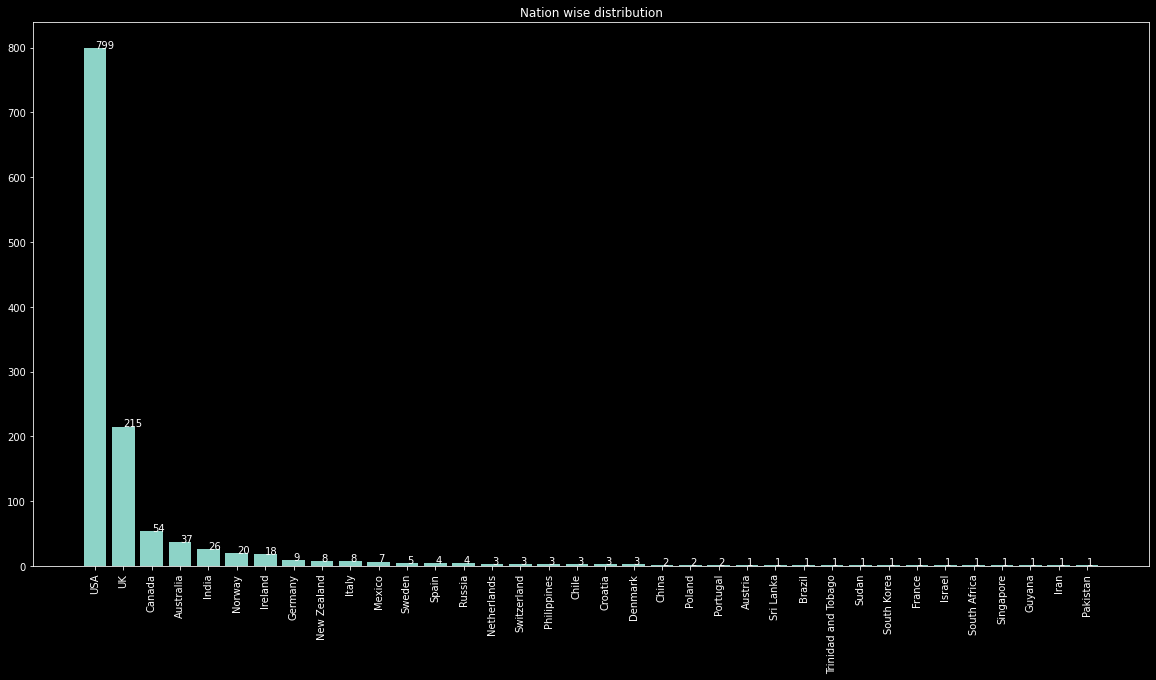

In [40]:
distData  = data.groupby('Nationality').size()
distData = distData.sort_values(ascending=False)
x = distData.index
y = distData.values
plt.figure(figsize=(20,10))
plt.bar(x, y)

for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.xticks(rotation = 90)
plt.title("Nation wise distribution")
plt.show()

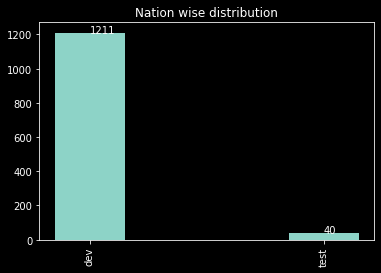

In [41]:
distData  = data.groupby('Set').size()
distData = distData.sort_values(ascending=False)
x = distData.index
y = distData.values
plt.bar(x, y, width = [0.3, 0.3])

for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.xticks(rotation = 90)
plt.title("Nation wise distribution")
plt.show()

In [42]:
data['StartingLetter'] = data['VGGFace1 ID'].apply(lambda x:x[0])
data.head()

,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set,StartingLetter
0,id10001,A.J._Buckley,m,Ireland,dev,A
1,id10002,A.R._Rahman,m,India,dev,A
2,id10003,Aamir_Khan,m,India,dev,A
3,id10004,Aaron_Tveit,m,USA,dev,A
4,id10005,Aaron_Yoo,m,USA,dev,A


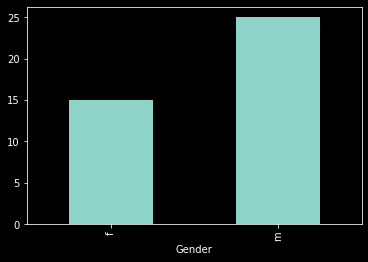

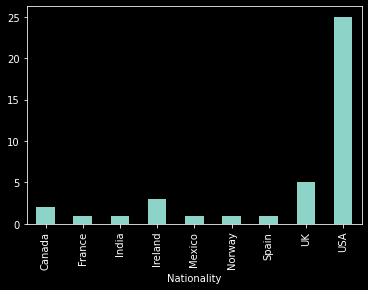

In [43]:
testSetData = data[data['StartingLetter']=='E']
testSetData.groupby('Gender').size().plot(kind='bar')
plt.show()
testSetData.groupby('Nationality').size().plot(kind='bar')
plt.show()

Other processing

In [44]:
import os 
folderLocation = r'D:\BiometricProject\FaceData'

for subj in os.listdir(folderLocation):
    if subj.startswith('.'):
        continue
    try:
        subjId = data[data['VGGFace1 ID']==subj]['VoxCeleb1 ID'].iloc[0]
        os.rename(os.path.join(folderLocation, subj), os.path.join(folderLocation, subjId))
    
    except Exception as e:
        print('Something went wrong for ',subj)
        print(str(e))
    